# Marr-Hildreth边缘检测算法

边缘检测的改进：

一、边缘检测方法是以使用较小的算则为基础的，

Marr和Hildreth证明了：（1）灰度变化与图像尺寸无关，因此他们的检测要求使用不同尺寸的算子；

（2）灰度的突然变化会在一阶导数中引起波峰或波谷，或在二阶导数中等效地引起零交叉。

根据这些建议，边缘检测算子应有两个显著特点：

（1）能计算图像中每一点处的一阶导数或二阶导数的数字近似的微分算子；

（2）能被“调整”以便在任何期望的尺寸上起作用。

因此，大的算子可用与检测模糊边缘，小的算子可用于检测锐度集中得到精细细节。

二、Marr和Hildreth论证过，满足这些条件最令人满意得到算子是滤波器



而G是标准差为（有时也称为空间常数）的二维高斯函数：

经过计算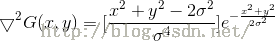

称为高斯拉普拉斯（LoG）.

LoG的零交叉出现在处，它定义了一个中心位于原点，半径为的圆。

LoG函数有时也称为墨西哥草帽算子。一个正的中心项由紧邻的负区域包围着，中心项的值以距原点的距离为函数而增大，

而外层区域的值零。系数之和必须为零，从而模板的响应在恒定灰度区域为零。

三、形状为5*5模板的近似，实际中将使用该模板的负值：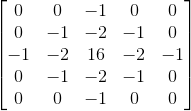

任意尺寸的模板可以通过式子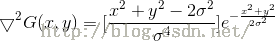取样，并标定系数以使系数之和为零来生成。

生成LoG滤波器的一种更有效的方法是以希望的n*n尺寸对式取样，然后将结果阵列与一个拉普拉斯模板进行卷积。

因为用一个系数之和为零的模板对图像阵列卷积产生一个元素之和也为零的结果，故这种方法自动满足LoG滤波器系数之和为零的要求。

四、选择算子的基础

（1）算子的高斯部分会模糊图像，从而在尺寸上将结构的灰度（包括噪声）降低到远小于的程度。

和均值滤波器平滑相比，高斯函数在空间和频率两个域平滑图像，因而在原图像中引入不存在的人为干扰（如振铃）的可能性小。

（2）滤波器的二阶部分。

尽管一阶导数用于检测灰度突变，但它们是有方向的算子。另一方面，拉普拉斯有各项同性（旋转不变性）。

对任何模板方向的灰度变化有相等的响应，从而避免了使用多 个模板去计算图像中任何点处的最强响应。

五、Marr-Hildreth算法由LOG滤波器与一幅输入图像f（x,y）卷积组成，即：



然后寻找g(x,y)的零交叉来确定f(x,y)中边缘的位置。

因为这些都是线性操作，故上式也可改下为：



它指出，我们可以先使用一个高斯滤波器平滑图像，然后计算该结果的拉普拉斯。这两个公式给出了相同的结果

六、总结

Marr-Hildreth边缘检测算法如下：

1.用一个对 
取样的n*n的高斯低通滤波器对输入图像滤波。

2.计算由第一步得到的图像的拉普拉斯，如模板
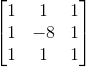

3.找到步骤2所得图像的零交叉。

为确定高斯滤波器的大小，仍采用位于二维高斯表面下其均值在3之间的99.7%。

这样，一个大小为n*n的LoG离散滤波器，其n值应是大于等于6的最小奇整数。

n小于该值的滤波器模板会“截断”LoG函数，截断的程度与模板的大小成反比；

而使用较大的模板对结果的影响不大。

零交叉点的确定：

以P为中心的一个3*3领域，p点处的零交叉意味着至少有两个相对的领域像素的符号不同。

有四种要测试的情况：左/右、上/下，和两个对角。如果g(x,y)的值与一个阈值比较（一种通用的方法），

那么不仅相对领域的符号不同，数值差的绝对值不能超过这个阈值，这时p称为一个零交叉像素。


零交叉是Marr-Hiltreth边缘检测方法的关键特征。

此外，Huertas and Medioni提出采用亚像素精度来寻找零交叉的方法。

设置阈值，可检测出大多数的主要边缘，并且滤掉一些“无关”特征，使用零交叉检测边缘可得到一个像素宽的边缘。

这一特性简化了诸如边缘连接的后续阶段的处理。

考虑到灰度变化取决于数值范围的试试，有时使用各种值来对一幅图像进行滤波。然后，所得零交叉边缘图与仅为全部图形保留的公共边缘相结合。

这种方法可得到很有用的信息，但由于其复杂性，实践中多被用于使用单一滤波器选择合适的值的设计工具。

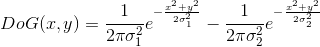
使用高斯差分（DoG）来近似LoG是可能的：

视觉系统中，某些“通道”就方向和频率而论，是有选择性的。且可以使用：

以1.75：1的标准差比率来建模。

使用1.6：1的比率不仅可以保持这些观察的基本特性，且可以对LoG提供一个更接近的“工程”近似。

为在LoG和DoG之间进行有意义的比较，对于LOG，

值必须按照如下公式选择，以便LoG和DoG具有相同的零交叉；

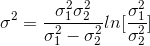

当使用这个值时，尽管LoG和DoG的零交叉相同，但它们的幅度大小会不同。可通过标定使得他们兼容，以便他们在原点处有相同的值。

LoG和DoG滤波操作均可直接使用一维卷积代替二维卷积来实现，对于一幅大学为M*N的图像和一个大小为n*n的滤波器，这样做可将每次卷积所需的乘法和加法次数，

从二维卷积的n*nMN成正比，减少到一维卷积的n*MN成正比。

========================================================================================================================

二阶微分算子，二阶微分算子典型的是Laplace算子，LoG可以看成是一个高斯模板的拉普拉斯变换，但是也可以从根源上推导出LoG算子，而后面要介绍的DoG则是为了纯粹的减少计算，模拟LoG的一种方法。

## LoG原理

LoG最底层的原理是二阶微分算子，也就是对原始图像求二次微分的边缘定位算法，前面的边缘模型中可以得知，当使用二阶微分算子的时候，其对边缘的响应是一个零交叉，而且能够判断出高灰度方向，但二阶微分对噪声的敏感度过高，需要平滑预处理。
Marr和Hildreth【Marr和Hildreth，1980】证明了以下两个观点：

- （1）灰度变化与图像尺寸没有关系，因此检测需要不同尺度的算子
- （2）灰度的突然变化会在一阶导数中引起波峰和波谷，或者二阶导数中一起零交叉

所以可以提出一种能变换尺寸的（当时用的是标准Sobel等那些，固定尺寸的，当时Sobel还没有扩展），在各种大小的图像上都能起作用的，可以检测模糊的相对较大的边缘，也可以检测细小的锐度集中的精细细节，当然这种算子也必须对全图所有像素点其作用。Marr和Hildreth证明LoG算子是满足上述条件的最满意的算子。


## 数学原理

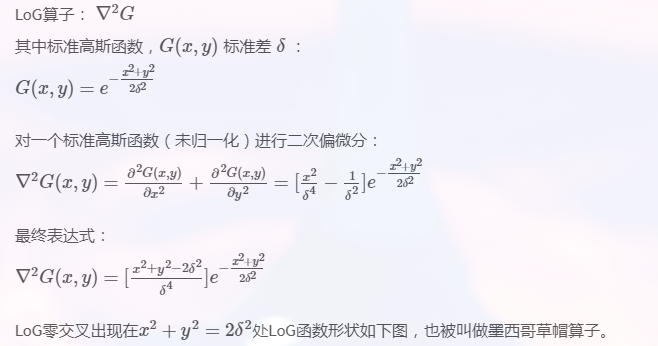

In [1]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f4.jpg',0)

In [24]:
dst1 = cv2.Laplacian(gray,cv2.CV_16S,3)

In [25]:
gb = cv2.GaussianBlur(gray,(3,3),1.5,1.5)

In [27]:
dst = cv2.Laplacian(gb,cv2.CV_16S,3)

In [28]:
dst = cv2.GaussianBlur(dst,(3,3),1.5,1.5)

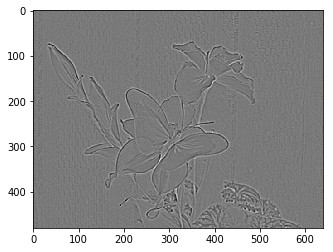

In [29]:
plt.imshow(dst,'gray')